# Bike Rental Data Analysis & Regression Modeling
Dataset: Bike_Rental_data(in).csv

In [2]:

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


## Load Dataset

In [ ]:

df = pd.read_csv("Bike_Rental_data.csv")
df.head()


C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_20092\1571136679.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Bike_Rental_data(in).csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.992410,1/1/2011,springer,2011,1,-0.009452,No,5.990616,No work,Clear,0.24,0.2879,0.81,0,3,13,15.999019
1,2.004157,1/1/2011,springer,2011,1,1.007925,No,5.996162,No work,Clear,0.22,0.2727,0.8,0,8,32,40.004970
2,2.984610,1/1/2011,springer,2011,1,1.993083,No,6.004768,No work,Clear,0.22,0.2727,?,0,5,27,32.004786
3,3.993251,1/1/2011,springer,2011,1,2.991451,No,5.980473,No work,Clear,0.24,0.2879,0.75,0,3,10,12.999856
4,4.990763,1/1/2011,springer,2011,1,4.024688,No,5.984412,No work,Clear,0.24,0.2879,0.75,0,0,1,1.002089


## Dataset Information

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100576 entries, 0 to 100575
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   instant     100576 non-null  float64
 1   dteday      100576 non-null  object 
 2   season      100576 non-null  object 
 3   yr          100576 non-null  object 
 4   mnth        100576 non-null  object 
 5   hr          100576 non-null  float64
 6   holiday     100576 non-null  object 
 7   weekday     100576 non-null  float64
 8   workingday  100576 non-null  object 
 9   weathersit  100576 non-null  object 
 10  temp        100576 non-null  object 
 11  atemp       100576 non-null  object 
 12  hum         100576 non-null  object 
 13  windspeed   100576 non-null  object 
 14  casual      100576 non-null  object 
 15  registered  100576 non-null  object 
 16  cnt         100576 non-null  float64
dtypes: float64(4), object(13)
memory usage: 13.0+ MB


## Descriptive Statistics

In [5]:

df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,100576.000000,100576,100576,100576,100576,100576.000000,100576,100576.000000,100576,100576,100576,100576,100576,100576,100576,100576,100576.000000
unique,NaN,731,5,5,25,NaN,3,NaN,3,5,51,66,90,31,323,777,NaN
top,NaN,29-07-2011,fall,2012,7,NaN,No,NaN,Working Day,Clear,0.62,0.6212,0.88,0,0,4,NaN
freq,NaN,156,26011,49396,8468,NaN,97706,NaN,68562,66055,4157,5706,3782,12565,9158,1779,NaN
mean,8688.878771,NaN,NaN,NaN,NaN,11.552431,NaN,3.002402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.332859
std,5019.386012,NaN,NaN,NaN,NaN,6.921326,NaN,2.008345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.247215
min,0.987460,NaN,NaN,NaN,NaN,-0.037539,NaN,-0.040162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.976830
25%,4345.006095,NaN,NaN,NaN,NaN,5.986351,NaN,1.006304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.998170
50%,8686.993279,NaN,NaN,NaN,NaN,11.986028,NaN,3.000195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.998595
75%,13038.998690,NaN,NaN,NaN,NaN,17.983380,NaN,4.993783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.989003


## Missing Values Check

In [6]:

df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Handling Missing Values

In [7]:

df = df.fillna(method='ffill')


C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_20092\646798202.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


## Target & Features

In [8]:

X = df.drop('cnt', axis=1)
y = df['cnt']


## Identify Categorical & Numerical Columns

In [9]:

cat_cols = X.select_dtypes(include='object').columns.tolist()

# treat numeric categorical columns as categorical
possible_cat = ['season','holiday','workingday','weather','month','weekday']
for col in possible_cat:
    if col in X.columns:
        cat_cols.append(col)

cat_cols = list(set(cat_cols))

# convert categorical columns to string
for col in cat_cols:
    X[col] = X[col].astype(str)

num_cols = X.select_dtypes(include=np.number).columns

cat_cols, num_cols


(['mnth',
  'atemp',
  'yr',
  'registered',
  'dteday',
  'weathersit',
  'workingday',
  'casual',
  'hum',
  'temp',
  'holiday',
  'windspeed',
  'weekday',
  'season'],
 Index(['instant', 'hr'], dtype='object'))

## Preprocessing (Scaling + Encoding)

In [10]:

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


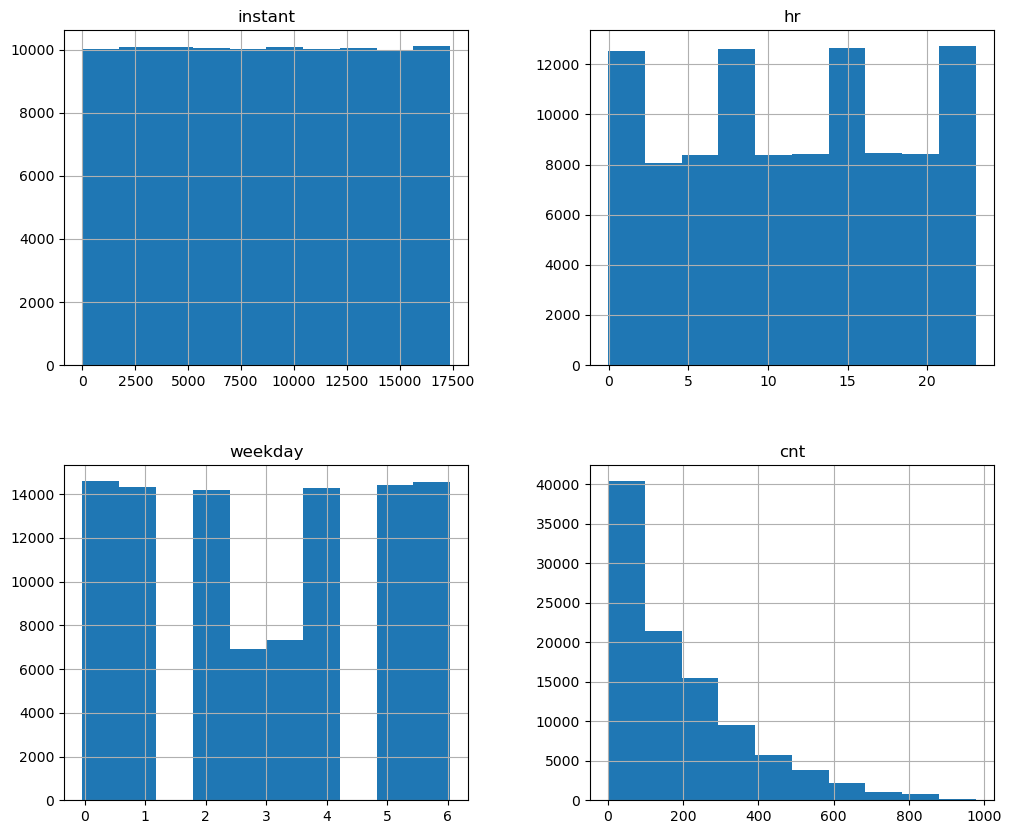

In [11]:

df.hist(figsize=(12,10))
plt.show()

## Train-Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Linear Regression Model

In [13]:

lin_model = Pipeline([
    ('preprocess', preprocess),
    ('model', LinearRegression())
])

lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2: 0.998308093980087
MSE: 55.69859301740919
RMSE: 7.46314900142086
MAE: 3.478320090615952


## Ridge Regression

In [14]:

for a in [0.1, 1, 10]:
    ridge = Pipeline([
        ('preprocess', preprocess),
        ('model', Ridge(alpha=a))
    ])
    ridge.fit(X_train, y_train)
    print(f"Ridge alpha={a}, R2={ridge.score(X_test, y_test)}")


Ridge alpha=0.1, R2=0.9980211759586417
Ridge alpha=1, R2=0.9949453167426209
Ridge alpha=10, R2=0.9577921724387845


## Lasso Regression

In [ ]:

for a in [0.01, 0.1, 1]:
    lasso = Pipeline([
        ('preprocess', preprocess),
        ('model', Lasso(alpha=a))
    ])
    lasso.fit(X_train, y_train)
    print(f"Lasso alpha={a}, R2={lasso.score(X_test, y_test)}")


## Conclusion


- Data preprocessing handled categorical and numerical features correctly  
- Linear, Ridge, and Lasso regression models were evaluated  
- Metrics like R², RMSE, MAE were used to assess performance  
